In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='STARS'>

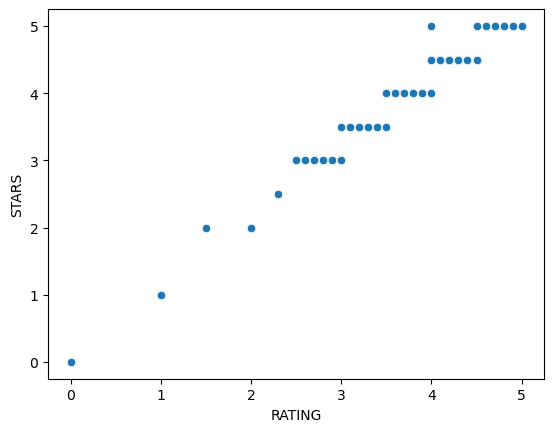

In [40]:
#try to understand the relationship between popularity of a film and its rating

sns.scatterplot(data=fandango, x='RATING',y='STARS')

In [8]:
fandango[fandango['VOTES'] > 25000]

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538


In [19]:
fandango["YEAR"] = fandango['FILM'].apply(lambda x:x.split('(')[-1][:-1]).apply(lambda y:int(y))

In [21]:
#How many movies per year in fandango df?
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

In [22]:
#movies with highest number of votes?
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [24]:
#movies with zero votes
(fandango['VOTES']==0).sum()

69

In [26]:
#create a df on only reviewed films
fan_reviewed = fandango[fandango['VOTES']>0]

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


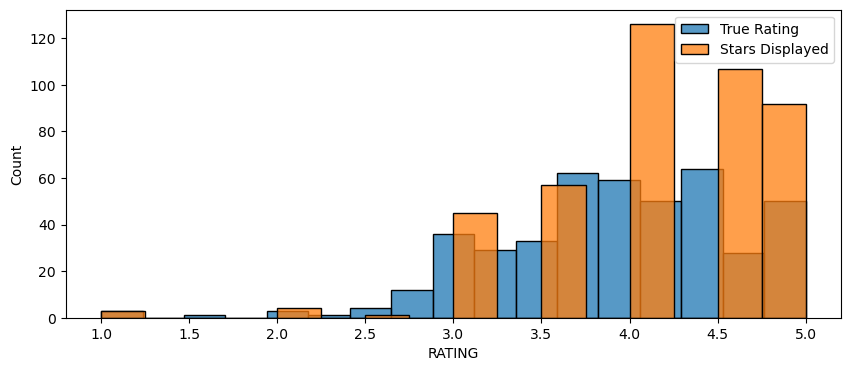

In [30]:
plt.figure(figsize=(10,4))
sns.histplot(data=fan_reviewed,x='RATING',label='True Rating')
sns.histplot(data=fan_reviewed,x='STARS',label='Stars Displayed')
plt.legend()

In [33]:
fan_reviewed['STARS_DIFF']=(fan_reviewed['STARS']-fan_reviewed['RATING']).round(2)

/var/folders/wl/v3x3g82n3b38s3cvwvtr0r7h0000gn/T/ipykernel_1558/4214796782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=(fan_reviewed['STARS']-fan_reviewed['RATING']).round(2)


In [34]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [35]:
fan_reviewed['STARS_DIFF'].value_counts()

STARS_DIFF
0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: count, dtype: int64

In [36]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Comparison with other Sites

In [37]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [38]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

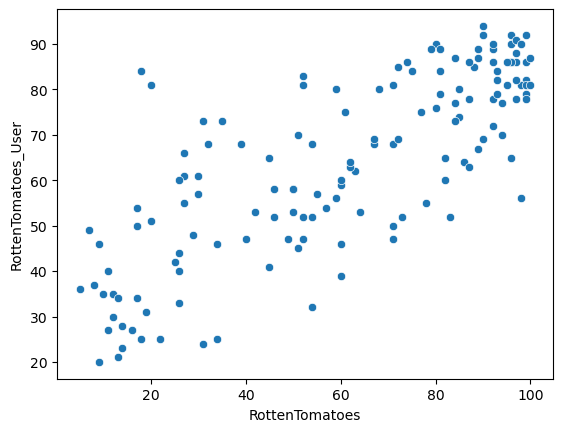

In [39]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [42]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [45]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

In [46]:
all_sites.nsmallest(5,'Rotten_Diff')

#Users love but critics hate

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [49]:
#top 5 movies in which critics scores higher than users
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

#critic love but Users hate

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Metacritic

In [50]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

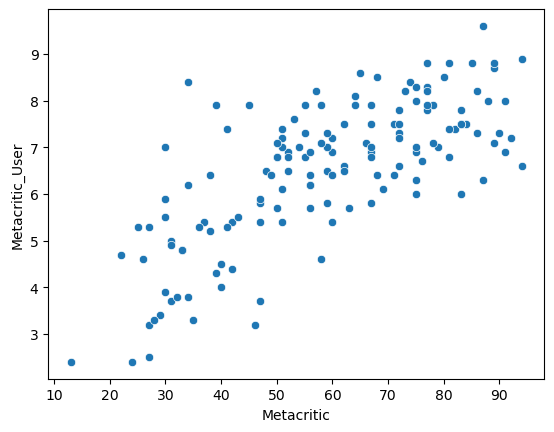

In [51]:
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

In [54]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


### Normalization columns to Fandango Stars and Ratings, that is, 0-5

In [57]:
df['RT_norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_norm']=np.round(df['RottenTomatoes_User']/20,1)

df['Meta_norm']=np.round(df['Metacritic']/20,1)
df['Meta_U_norm']=np.round(df['Metacritic_User']/2,1)

df['IMDB_norm'] = np.round(df['IMDB']/2,1)

In [58]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [59]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_U_norm', 'IMDB_norm'],
      dtype='object')

In [61]:
norm_scores = df[['STARS', 'RATING','RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_U_norm', 'IMDB_norm']]

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

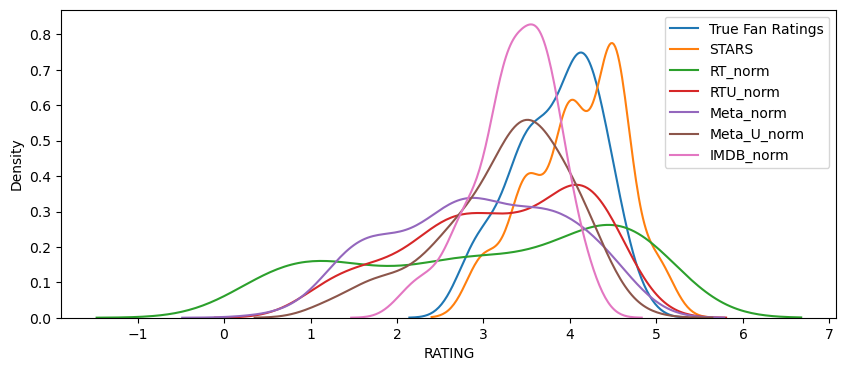

In [63]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=norm_scores,x='RATING',label='True Fan Ratings')
sns.kdeplot(data=norm_scores,x='STARS',label='STARS')
sns.kdeplot(data=norm_scores,x='RT_norm',label='RT_norm')
sns.kdeplot(data=norm_scores,x='RTU_norm',label='RTU_norm')
sns.kdeplot(data=norm_scores,x='Meta_norm',label='Meta_norm')
sns.kdeplot(data=norm_scores,x='Meta_U_norm',label='Meta_U_norm')
sns.kdeplot(data=norm_scores,x='IMDB_norm',label='IMDB_norm')
plt.legend()
plt.show()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

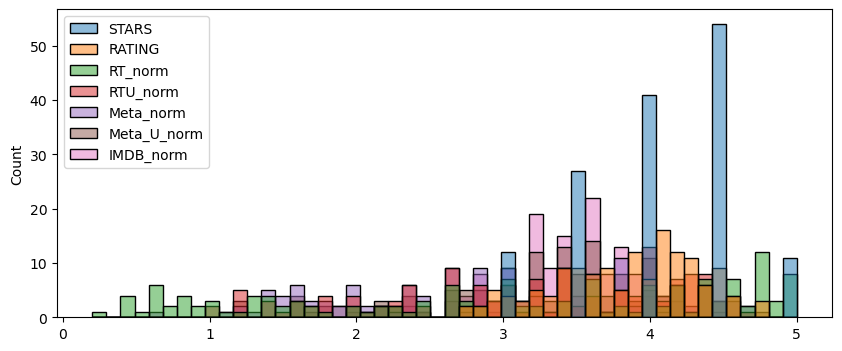

In [65]:
plt.figure(figsize=(10,4))
sns.histplot(norm_scores,bins = 50)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

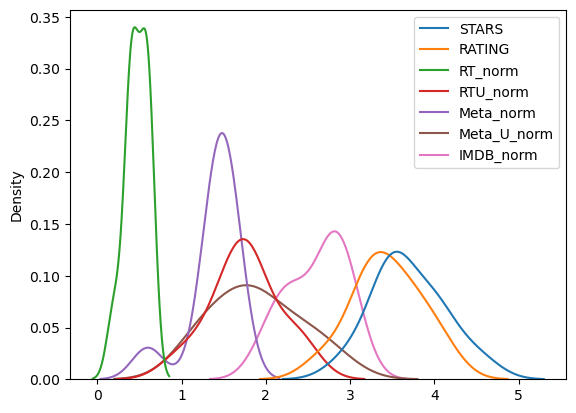

In [67]:
sns.kdeplot(norm_scores.nsmallest(10,'RT_norm'))

In [68]:
norm_scores.nsmallest(10,'RT_norm')

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [69]:
df.iloc[25]

FILM                          Taken 3 (2015)
STARS                                    4.5
RATING                                   4.1
VOTES                                   6757
YEAR                                    2015
RottenTomatoes                             9
RottenTomatoes_User                       46
Metacritic                                26
Metacritic_User                          4.6
IMDB                                     6.1
Metacritic_user_vote_count               240
IMDB_user_vote_count                  104235
Rotten_Diff                              -37
RT_norm                                  0.4
RTU_norm                                 2.3
Meta_norm                                1.3
Meta_U_norm                              2.3
IMDB_norm                                3.0
Name: 25, dtype: object